In [1]:
#!pip install tensorflow keras split-folders opencv-python

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
import numpy as np
import splitfolders
import cv2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import layers, models
import os
import random
import requests
from io import BytesIO
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [3]:
input_folder = r'C:\Users\HP\OneDrive\Desktop\Projects\Image Recognization Model_Agri_Crop\Agricultural-crops'
#Output_folder where the model’s results (like recognized images, logs, or predictions) will be saved after processing.
output_folder = r'C:\Users\HP\OneDrive\Desktop\Projects\Image Recognization Model_Agri_Crop\Image_Recongization' 

Split the data into 3 parts (Training, Validation and testing) Respectively in split ratio

In [4]:
split_ratio = (0.8, 0.1,0.1)

splitfolders.ratio(
    input_folder,
    output = output_folder,
    seed = 500,
    ratio = split_ratio,
    group_prefix = None
)

Copying files: 829 files [00:04, 196.16 files/s]


In [5]:
# Define the parameters image size (each image will resize by 224/224 pixel) awith batch size of 32
img_size = (224, 224)
batch_size = 30

train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)


In [6]:
# Data Augmentation for test data only for rescaling
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# Data Augmentation for validation data (only rescaling)
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [7]:
train_dir = os.path.join(output_folder,'train')
val_dir = os.path.join(output_folder,'val')
test_dir = os.path.join(output_folder,'test')

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode='categorical'
)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode='categorical'
)
valid_data = valid_datagen.flow_from_directory(
    val_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode='categorical'
)

Found 652 images belonging to 30 classes.
Found 105 images belonging to 30 classes.
Found 72 images belonging to 30 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


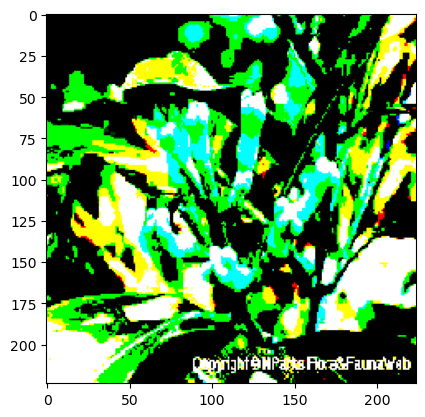

In [8]:
# Get a batch of images and labels
images, labels = next(valid_data)

#select a random image from the batch
idx = random.randint(0, images.shape[0] -1)

# Display the image
plt.imshow(images[idx])
plt.show()

In [9]:
from tensorflow.keras.applications import ResNet50
base_model = ResNet50(weights='imagenet',include_top= False, input_shape= (img_size[0],img_size[1],3) )
#Freez the convolution base( it will train only newly added classification layers)
base_model.trainable = False

In [10]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(30, activation = 'softmax')
])

In [11]:
train_data

In [12]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [13]:
model.fit(train_data, epochs =50, validation_data=valid_data)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.0386 - loss: 3.9017 - val_accuracy: 0.2639 - val_loss: 2.8383
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.1545 - loss: 2.9843 - val_accuracy: 0.4028 - val_loss: 2.3201
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.2639 - loss: 2.5848 - val_accuracy: 0.5139 - val_loss: 1.9001
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.3398 - loss: 2.3416 - val_accuracy: 0.6111 - val_loss: 1.6620
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.4350 - loss: 1.9070 - val_accuracy: 0.6389 - val_loss: 1.3983
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.5550 - loss: 1.6087 - val_accuracy: 0.6944 - val_loss: 1.3180
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.5684 - loss: 1.4855 - val_accuracy: 0.6806 - val_loss: 1.2024
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.5792 - loss: 1.5130 - val_accuracy: 0.7083 - val_loss:

In [17]:
#Evaluvate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test Accuarcy : {test_accuracy * 100:.2f}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7894 - loss: 0.6874
Test Accuarcy : 80.95%


In [18]:
dataset_dir = r'C:\Users\HP\OneDrive\Desktop\Projects\Image Recognization Model_Agri_Crop\Image_Recongization\train'
class_names = sorted([d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))])

print(class_names)

['Cherry', 'Coffee-plant', 'Cucumber', 'Fox_nut(Makhana)', 'Lemon', 'Olive-tree', 'Pearl_millet(bajra)', 'Tobacco-plant', 'almond', 'banana', 'cardamom', 'chilli', 'clove', 'coconut', 'cotton', 'gram', 'jowar', 'jute', 'maize', 'mustard-oil', 'papaya', 'pineapple', 'rice', 'soyabean', 'sugarcane', 'sunflower', 'tea', 'tomato', 'vigna-radiati(Mung)', 'wheat']


In [23]:
def predict_img(image, model, class_names):
    # Check if the input is a URL or a local file
    if image.startswith('http://') or image.startswith('https://'):
        # Download the image from the URL
        response = requests.get(image)
        img = Image.open(BytesIO(response.content))
        print(img)
        img = np.array(img)
    elif os.path.exists(image):
        # Load the image from the local file system
        img = cv2.imread(image)
    else:
        print(f"Error: File {image} does not exist.")
        return
    
    # Preprocess the image
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Predict the class
    result = model.predict(img)
    predicted_class = np.argmax(result)
    
    # Print the result and the predicted class
    print("Prediction probabilities:", result)
    print("Predicted class index:", predicted_class)
    print("Predicted class name:", class_names[predicted_class])

img_url = 'https://blog.agribegri.com/public/blog_images/papaya-farming-guide-600x400.jpg'
predict_img(img_url, model, class_names)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x400 at 0x260140E4410>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Prediction probabilities: [[1.9907995e-07 1.3759874e-09 2.1748388e-05 5.9134954e-06 9.3633789e-06
  4.9326058e-02 1.0695188e-09 2.6037029e-07 6.0670325e-03 4.3060452e-05
  3.0188250e-05 1.6507850e-09 1.6781287e-08 1.5790008e-04 1.3645467e-05
  1.8738904e-06 6.1333832e-10 1.0876614e-09 2.2484347e-08 1.1958193e-11
  9.4425654e-01 7.2945139e-10 1.3595188e-12 8.5678193e-06 9.1441635e-08
  6.8926909e-09 1.8186348e-11 5.7332381e-05 2.1535533e-07 5.3207216e-10]]
Predicted class index: 20
Predicted class name: papaya


In [24]:
model.save('image_model.keras')